# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = "C:/Users/YUHSHEN/Documents/Python/Part01"

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
age_data=app_train[["DAYS_BIRTH","TARGET"]]

In [6]:
age_data["YEARS_BIRTH"]=age_data["DAYS_BIRTH"]/365
age_data["YEARS_BIRTH"].describe()
print(age_data.head())

   DAYS_BIRTH  TARGET  YEARS_BIRTH
0        9461       1    25.920548
1       16765       0    45.931507
2       19046       0    52.180822
3       19005       0    52.068493
4       19932       0    54.608219


C:\Users\YUHSHEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
cut=range(20,70,5)
age_data["YEARS_BIRTH_CUT"]=pd.cut(age_data["YEARS_BIRTH"],bins=cut,right=False)
cuts=age_data["YEARS_BIRTH_CUT"].value_counts().index.sort_values()

In [7]:
age_data["YEARS_BIRTH_GROUP"]=pd.cut(age_data["YEARS_BIRTH"],10)
age_data["YEARS_BIRTH_GROUP"].value_counts()

C:\Users\YUHSHEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: YEARS_BIRTH_GROUP, dtype: int64

In [15]:
age_data["YEARS_BIRTH_FREQ"]=pd.qcut(age_data["YEARS_BIRTH"],10)
age_data["YEARS_BIRTH_FREQ"].value_counts()
years_group_CUT=age_data["YEARS_BIRTH_CUT"].value_counts().index.sort_values()

KeyError: 'YEARS_BIRTH_CUT'

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

SystemError: <built-in function _abc_instancecheck> returned a result with an error set

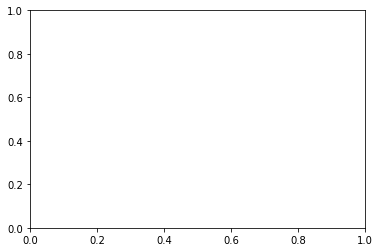

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,6))
for i in range(len(cuts)):
    sns.distplot(age_data.loc[(age_data["YEARS_BIRTH_FREQ"]==cuts[i]) &(age_data["TARGET"]==0),"YEARS_BIRTH_FREQ"],label=str(cuts[i]))
    sns.distplot(age_data.loc[(age_data["YEARS_BIRTH_FREQ"]==cuts[i])&(age_data["TARGET"]==1),"YEARS_BIRTH_FREQ"],label=str(cuts[i]))
plt.title("KDE with AGE FREQ")
plt.show()

SystemError: <built-in function _abc_instancecheck> returned a result with an error set

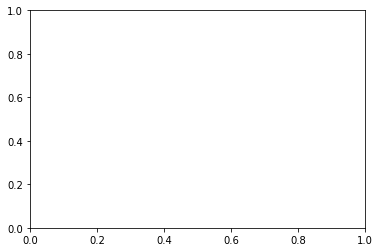

In [13]:
for i in range(len(years_group_CUT)):
    sns.distplot(age_data.loc[(age_data['YEARS_BIRTH_CUT'] == years_group_CUT[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH_CUT'], label = str(years_group_CUT[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BIRTH_CUT'] == years_group_CUT[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH_CUT'], label = str(years_group_CUT[i]))

In [36]:
app_train["DAYS_BIRTH_CUT"]=app_train[~app_train["DAYS_BIRTH_CUT"].isnull()]["DAYS_BIRTH_CUT"].value_counts().sort_values().reset_index()

In [37]:
app_train["DAYS_BIRTH_CUT"]

0           [7489.0, 7854.0)
1         [24644.0, 25009.0)
2         [24279.0, 24644.0)
3           [7854.0, 8219.0)
4         [23914.0, 24279.0)
5           [8219.0, 8584.0)
6           [8584.0, 8949.0)
7           [8949.0, 9314.0)
8         [23549.0, 23914.0)
9           [9314.0, 9679.0)
10        [23184.0, 23549.0)
11        [22454.0, 22819.0)
12        [22819.0, 23184.0)
13        [22089.0, 22454.0)
14        [20994.0, 21359.0)
15        [18439.0, 18804.0)
16         [9679.0, 10044.0)
17        [21359.0, 21724.0)
18        [21724.0, 22089.0)
19        [20264.0, 20629.0)
20        [18074.0, 18439.0)
21        [18804.0, 19169.0)
22        [17709.0, 18074.0)
23        [17344.0, 17709.0)
24        [20629.0, 20994.0)
25        [19899.0, 20264.0)
26        [19169.0, 19534.0)
27        [16979.0, 17344.0)
28        [16249.0, 16614.0)
29        [16614.0, 16979.0)
                 ...        
307481                   NaN
307482                   NaN
307483                   NaN
307484        